In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [14]:
@jit(nopython=True)
def df1_2(data:np.array,dh:float,axis:int=0) :
    # return (np.roll(data, 1, axis=axis) 
    #         -np.roll(data, -1, axis=axis))/(2*dh)
    data_deriv = np.zeros_like(data)
    if axis == 0:
        N = data.shape[0]
        data_deriv[1:N-1,:] = (data[2:N,:] - data[0:N-2,:])/(2*dh) 
    elif axis == 1:
        N = data.shape[1]
        data_deriv[:,1:N-1] = (data[:,2:N] - data[:,0:N-2])/(2*dh)
    return data_deriv

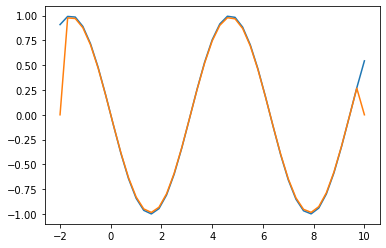

In [15]:
from numpy import cos, sin
X, dx = np.linspace(-2, 10, 41, retstep=True)
Y = cos(X)

_Y = np.zeros((len(Y), 1))
_Y[:,0] = Y
dYdX = df1_2(_Y,dx)
fig, ax = plt.subplots()
ax.plot(X,-sin(X))
ax.plot(X, dYdX)